<a href="https://colab.research.google.com/github/josegerman/machine-learning/blob/main/PyCaret_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Regression Project using PyCaret ML library**<br>
By: Jose German

# Install requirements

In [1]:
# install pycaret
#pip install pycaret

# install pycaret plus all dependencies
!pip install pycaret[full]

  Using cached pycaret-3.2.0-py3-none-any.whl (484 kB)
  Using cached category_encoders-2.6.3-py2.py3-none-any.whl (81 kB)
  Using cached deprecation-2.1.0-py2.py3-none-any.whl (11 kB)
  Using cached kaleido-0.2.1-py2.py3-none-manylinux1_x86_64.whl (79.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 41.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/10

In [2]:
# Install MLFlow
# This library manages the ML project; It also used to track parameters, metrics, hyperparameters, feature parameters, code versions, etc
!pip install mlflow

# Imports

In [3]:
# check installed version; should be 3.0 or newer
import pycaret
pycaret.__version__

'3.2.0'

In [4]:
import pandas as pd

# Loading dataset

In [5]:
housedata = pd.read_csv('/content/new_train.csv')
housedata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,...,Exterior_BrkFace,Exterior_VinylSd,Exterior_HdBoard,Exterior_MetalSd,Exterior_Plywood,Exterior_ImStucc,Exterior_CBlock,Exterior_Stucco,Exterior_BrkComm,Exterior_WdShing
0,1,2-STORY 1946+,RL,65.0,8450,NaN,0,Lvl,Inside,0,...,0,1,0,0,0,0,0,0,0,0
1,2,1-STORY 1946+,RL,80.0,9600,NaN,0,Lvl,FR2,0,...,0,0,0,1,0,0,0,0,0,0
2,3,2-STORY 1946+,RL,68.0,11250,NaN,1,Lvl,Inside,0,...,0,1,0,0,0,0,0,0,0,0
3,4,2-STORY 1945-,RL,60.0,9550,NaN,1,Lvl,Corner,0,...,0,0,0,0,0,0,0,0,0,1
4,5,2-STORY 1946+,RL,84.0,14260,NaN,1,Lvl,FR2,0,...,0,1,0,0,0,0,0,0,0,0


# Initial setup

In [7]:
from pycaret.regression import *
#eg1 = setup(housedata, target='SalePrice', session_id=123, log_experiment=True, experiment_name='houseprice1')

# Below code line is similar to above except here we don't need MLFLow to log the experiment
reg1 = setup(housedata, target='SalePrice', session_id=123)


,Description,Value
0,Session id,123
1,Target,SalePrice
2,Target type,Regression
3,Original data shape,"(1456, 98)"
4,Transformed data shape,"(1456, 213)"
5,Transformed train set shape,"(1019, 213)"
6,Transformed test set shape,"(437, 213)"
7,Ordinal features,1
8,Numeric features,79
9,Categorical features,18


# Compare model baselines
Compare models function trains and evaluates the performance of al the estimators available in the model library using cross validation. The output is a scoring grid with average cross validated scored.

In [8]:
best_model = compare_models(fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,14091.7637,460605734.9521,21229.1383,0.9253,0.1172,0.0839,7.8940
gbr,Gradient Boosting Regressor,15945.6097,572501405.8010,23691.7101,0.9070,0.1288,0.0946,1.1700
lightgbm,Light Gradient Boosting Machine,15988.9805,584902671.4449,23923.6088,0.9052,0.1325,0.0947,1.5660
br,Bayesian Ridge,17278.5329,612508039.2940,24590.3782,0.8993,0.1672,0.1066,0.7580
llar,Lasso Least Angle Regression,17641.8941,643493725.3204,25127.7840,0.8950,0.1647,0.1076,0.4880
ridge,Ridge Regression,17890.8806,649887225.9588,25397.4775,0.8918,0.1637,0.1094,0.4880
et,Extra Trees Regressor,17285.7992,722876373.3781,26497.6837,0.8839,0.1417,0.1025,1.9320
xgboost,Extreme Gradient Boosting,18018.3581,716984020.5101,26631.1280,0.8819,0.1386,0.1039,0.8980
rf,Random Forest Regressor,17577.0082,737918314.4469,26877.6747,0.8802,0.1444,0.1045,2.3160
lasso,Lasso Regression,18634.2618,729186390.9582,26868.2343,0.8786,0.1876,0.1140,0.5440


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

`compare_model` uses all estimators in model library except models with `Turbo=False`. `models()` will list all available modelss.

In [15]:
# Show best model
best_model

In [16]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


# Analyze model
Plot model function analyzes the performance of the trained model ona test test.

In [11]:
# Check help for available plots
#help(plot_model)

YellowbrickAttributeError: neither visualizer 'ResidualsPlot' nor wrapped estimator 'CatBoostRegressor' have attribute 'hax'

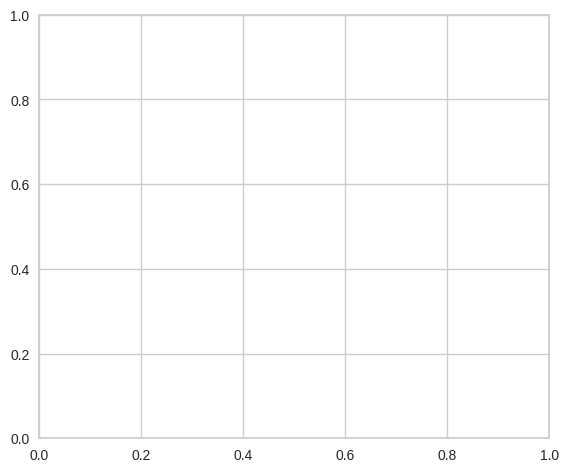

In [17]:
# Lets plot residuals
plot_model(best_model, plot='residuals')

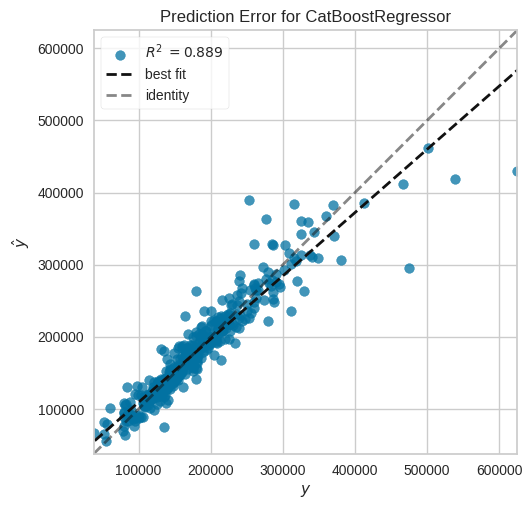

In [18]:
# Lets plot the errors
plot_model(best_model, plot='error')

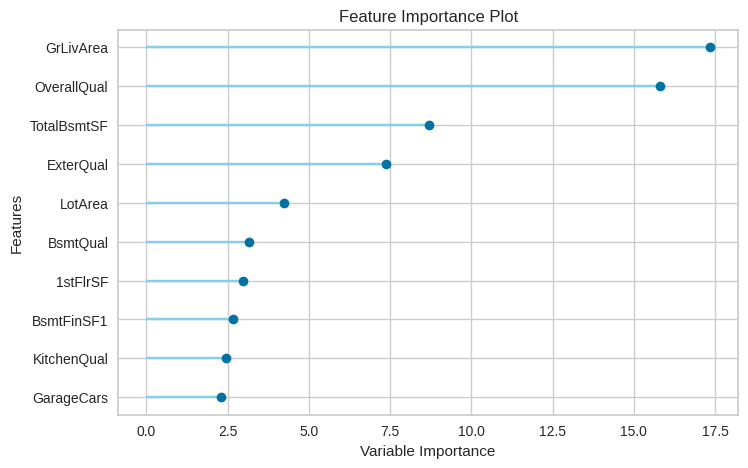

In [19]:
# Lets plot feature importance
plot_model(best_model, plot='feature')

# Create model

CatBoost Regressor used here which is the best model.

In [ ]:
# Train model with default fold=10
catboost = create_model('catboost')

# Similar as above code line with specific number of folds
#lightgbm = create_model('lightgbm', fold=3)

`compare_models` allows specific models to be compared.

In [ ]:
# Compare top 3 models
compare_regression_models = compare_models(include = ['catboost','lightgbm','gbr'])

In [ ]:
# Show best model from the top 3 specified in previous cell
compare_regression_models

By default `compare_models` return the single best performing model (as seen in above cell) based on a defined metric.

In [ ]:
# Get top 3 model based on MAE
best_mae_models_top3 = compare_models(sort = 'MAE', n_select=3)

In [ ]:
best_mae_models_top3

In [ ]:
# Train linear regression with specific model parameters

#create_model('catboost', fit_intercept = False) #fit_intercept applies to LGBMRegressor
create_model('catboost')

# Tune hyperparameters

In [ ]:
#tuned_lightgbm = tune_model(lightgbm, n_iter=50, optimize='MAE')

# Default parameters
tuned_catboost = tune_model(catboost)

In [ ]:
# Show tuned hyperparameters
tuned_catboost

In [ ]:
#help(tune_model)

# Ensemble model
Ensemble model function enables a given estimator.

In [ ]:
catboost_dt = ensemble_model(catboost, n_estimators=50)

In [ ]:
catboost_boosted = ensemble_model(catboost, method='Boosting')

In [ ]:
# Help will show additional parameters for ensemble_model
#help(ensemble_model)

# Blend models
`blend_models` function trains a `VotingRegressor` for select models passed in the `estimator_list` parameter.

In [ ]:
# Top 3 models
best_mae_models_top3

In [ ]:
# Blend top 3 models
blend_models(best_mae_models_top3)

In [ ]:
#help(blend_models)

# Stack models
The stack_models function trains a meta-model over select estimators passed in the estimator_list parameter.

In [ ]:
stack_models(best_mae_models_top3)

In [ ]:
#help(stack_models)

# Analyze and plot model

In [ ]:
# Additional analyzis to different models

# Interpret model

In [ ]:
interpret_model(catboost)

In [ ]:
interpret_model(catboost, plot='correlation')

In [ ]:
interpret_model(catboost, plot='reason', observation=12)

# AutoML
Function returns the best model out of all trained models in the current setup based on the optimize parameter.

In [ ]:
automl()

# As in our above code 'catboost' model was also chosen the best model by AutoML()

# Dashboard
Dashboard function generates the interactive dashboard for a trained model.

In [ ]:
dashboard(catboost, display_format='inline')

# Predict model
Predict model function allows us to review the actual 'SalePrice' with the 'prediction_label'. Actual prices are very close to predicted.

In [ ]:
pred_holdouts = predict_model(catboost)
pred_holdouts.head()

# Create app
Create a basic gradio app for inference

In [ ]:
create_app(catboost)

# Create API
Function takes an input model and creates a POST API for inference.

In [ ]:
# Create API
create_api(catboost, api_name = 'housing_price_api')